<a href="https://colab.research.google.com/github/rusetskiy1974/Data-Sciens/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from pathlib import Path
from zipfile import ZipFile
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import scale
from sklearn.preprocessing import scale


In [2]:

SAVED_DATAFRAME_BASE = Path("/content/")
URL = "https://drive.usercontent.google.com/download?id=1Zvz20Iqeia1eEtFbGa3NcIrt_SNSimP6&export=download&authuser=0"
OUTPUT = Path("/content/data.zip")
CSV_DATA_PATH  = Path("/content/data")

response = requests.get(URL)
if response.status_code == 200:
    with open(OUTPUT, "wb") as file:
        file.write(response.content)
        print(f"Файл завантажено за адресою: {OUTPUT}")
else:
    print(f"Помилка завантаження файлу. Статус код: {response.status_code}")

try:
    with ZipFile(OUTPUT, 'r') as zip_ref:
        zip_ref.extractall(SAVED_DATAFRAME_BASE)
        print(f"Файл розпаковано до: {SAVED_DATAFRAME_BASE}")
except zipfile.BadZipFile:
    print("Помилка: завантажений файл не є ZIP-файлом.")

for path in CSV_DATA_PATH.iterdir():
    print(path)

FileNotFoundError: [Errno 2] No such file or directory: '\\content\\data.zip'

# Завантажимо датасет data_2d присвоївши стовпцям назви "X", "Y", "Z"

In [ ]:
df_2d = pd.read_csv(CSV_DATA_PATH.joinpath("data_2d.csv"), header=None ,names=["X","Y","Z"])
df_2d.info()
print(df_2d.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       200 non-null    float64
 1   Y       200 non-null    float64
 2   Z       200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB
       X         Y         Z
6    0.0  1.503020  1.074847
39   0.0 -0.992765  0.196103
21   0.0  0.625738  1.818900
11   0.0  0.942587  0.867662
131  1.0  2.979271  4.057865
154  1.0  3.003628  3.086627
83   0.0  1.033483  0.385318
66   0.0  2.695722  1.425587
137  1.0  2.800971  4.619526
103  1.0  0.985955  4.726830


 Масштабування даних

In [ ]:
X_2d = scale(df_2d, axis=0, with_mean=True, with_std=True)

# Визначення оптимальної кількості кластерів за допомогою Elbow Method

Метод Elbow для визначення оптимальної кількості кластерів

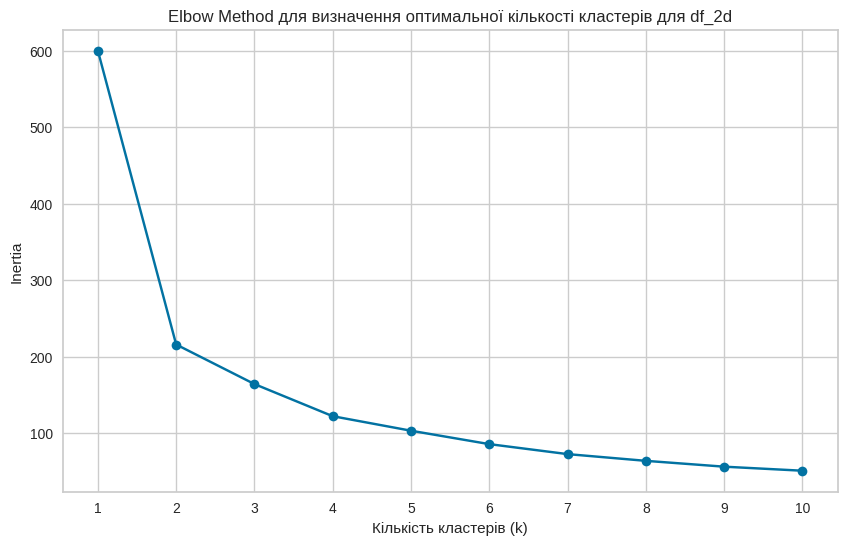

In [ ]:
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_2d)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method для визначення оптимальної кількості кластерів для df_2d')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Метод yellowbrick для визначення оптимальної кількості кластерів

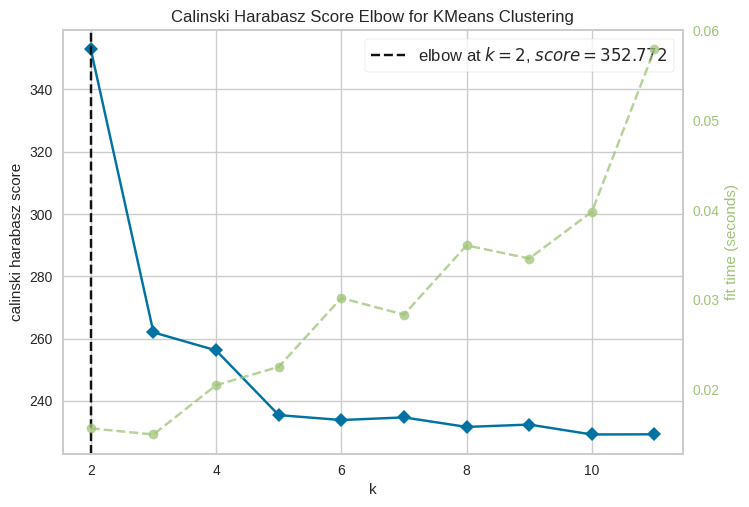

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
model = KMeans(n_init=10, random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 12), metric='calinski_harabasz')
visualizer.fit(X_2d)
visualizer.show()

In [ ]:
optimal_k_2d = visualizer.elbow_value_
print(f'Оптимальна кількість кластерів: {optimal_k_2d}')
kmeans_2d = KMeans(n_clusters=optimal_k_2d, n_init=10, random_state=42)
y_kmeans_2d = kmeans_2d.fit_predict(X_2d)

Оптимальна кількість кластерів: 2


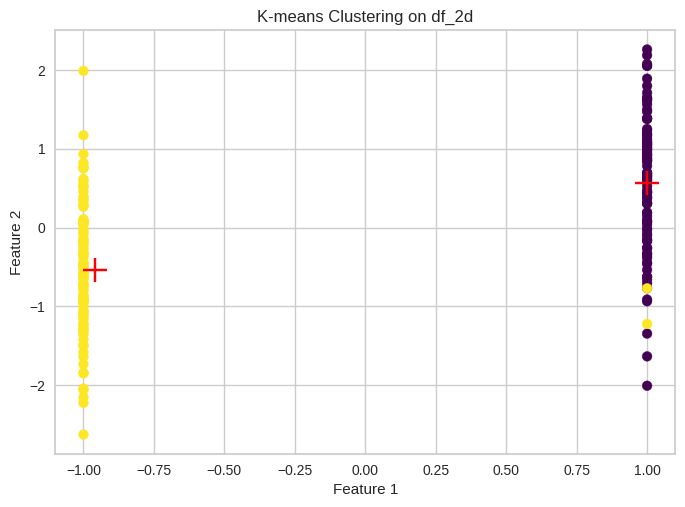

In [ ]:
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_kmeans_2d, cmap='viridis')
plt.scatter(kmeans_2d.cluster_centers_[:, 0], kmeans_2d.cluster_centers_[:, 1], s=300, c='red', marker='+')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering on df_2d')
plt.show()

In [ ]:

kmeans_2d.labels_, kmeans_2d.cluster_centers_

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0], dtype=int32),
 array([[ 1.        ,  0.56518053,  0.82493211],
        [-0.96078431, -0.54301659, -0.79258183]]))

In [ ]:
unique, counts = np.unique(kmeans_2d.labels_, return_counts=True)
for u,c in zip(unique, counts):
  print(u,c)

0 98
1 102


Проведемо кластерізацію Standard Kmeans методом

In [ ]:
df = pd.DataFrame(X_2d)


Задамо центроїди для кластерів випадковим чином

,0,1,2
88,-1.0,-0.016063,-0.849487
92,-1.0,0.358217,-1.410409


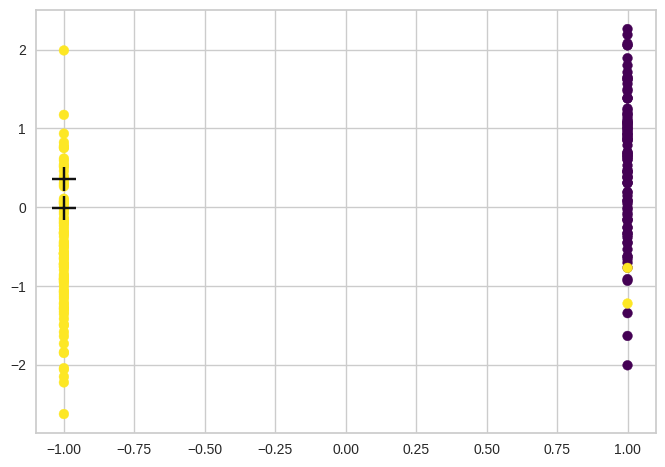

In [ ]:
def random_centroids(k, df):
    return df.sample(k)

centroids = random_centroids(optimal_k_2d, df)
display(centroids)


plt.scatter(X_2d[:,0], X_2d[:, 1],c=y_kmeans_2d, cmap='viridis')
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1], marker="+", c='k', s=300)
plt.show()

Застосуємо ручний метод для кластеризації K-MEANS

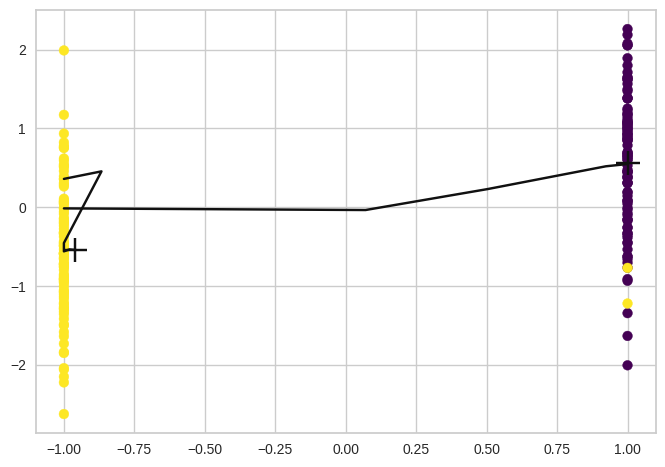

In [ ]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

centroids_history = {}

def find_min_distance(row, centroids):

  centroids.reset_index(drop=True, inplace=True)
  for i, c in centroids.iterrows():
    c_df = centroids_history.get(i, pd.DataFrame({0: [], 1: []}) )
    c_df = pd.concat([c_df, pd.DataFrame([c])], axis=0)
    centroids_history[i] = c_df

  errors = np.array([np.square(np.sum((row-c)**2)) for i, c in centroids.iterrows()])
  return errors.argmin(), errors.min()

def kmeans(df, k, centroids, tol=1e-4):
    err = []
    i = 0


    while True:
        df['centroids'], temp_err = list(zip(*[find_min_distance(row, centroids) for i, row in df.iterrows()]))
        err.append(sum(temp_err))
        centroids = df.groupby('centroids').agg('mean').reset_index(drop = True)
        if i > 0:
          if err[i-1]-err[i] < tol:
            break
        i += 1

    return df['centroids'], centroids

predicted_clusters, final_centroids = kmeans(df, optimal_k_2d, centroids)

plt.scatter(X_2d[:, 0], X_2d[:, 1], c=predicted_clusters, cmap='viridis')
plt.scatter(final_centroids.iloc[:,0], final_centroids.iloc[:,1], marker="+", c='k', s=300)

for k, v in centroids_history.items():
  plt.plot(v[0], v[1], c='k')

In [ ]:
predicted_clusters.values, final_centroids.values

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]),
 array([[ 1.        ,  0.56518053,  0.82493211],
        [-0.96078431, -0.54301659, -0.79258183]]))

In [ ]:
unique, counts = np.unique(predicted_clusters, return_counts=True)
for u,c in zip(unique, counts):
  print(u,c)

0 98
1 102


# Завантаження та підготовка даних MNIST

In [ ]:

df_mnist_raw = pd.read_csv(CSV_DATA_PATH.joinpath("mnist.csv"), header=None)
df_mnist_y = df_mnist_raw.iloc[:, 0]  
df_mnist = df_mnist_raw.iloc[:, 1:]  


Датасет MNIST складається із зображень розміром 28x28 пікселів, де кожен піксель представлений значенням від 0 до 255. Нормалізація цих значень шляхом ділення на 255 змінює діапазон значень пікселів до 0-1. Це може поліпшити продуктивність алгоритмів машинного навчання

In [ ]:
df_mnist = df_mnist / 255.0
df_mnist.info()
df_mnist.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 784 entries, 1 to 784
dtypes: float64(784)
memory usage: 3.0 MB


,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
count,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,500.000000,500.000000,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001984,0.001004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.044371,0.022448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.992157,0.501961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_mnist_y.head()

0    7
1    2
2    1
3    0
4    4
Name: 0, dtype: int64

# Масштабування даних, нормалізуємо їх до середнього значення 0 і стандартного відхилення 1

In [ ]:

scaler = StandardScaler()
df_mnist_scaled = scaler.fit_transform(df_mnist)

# Визначення оптимальної кількості кластерів за допомогою Elbow

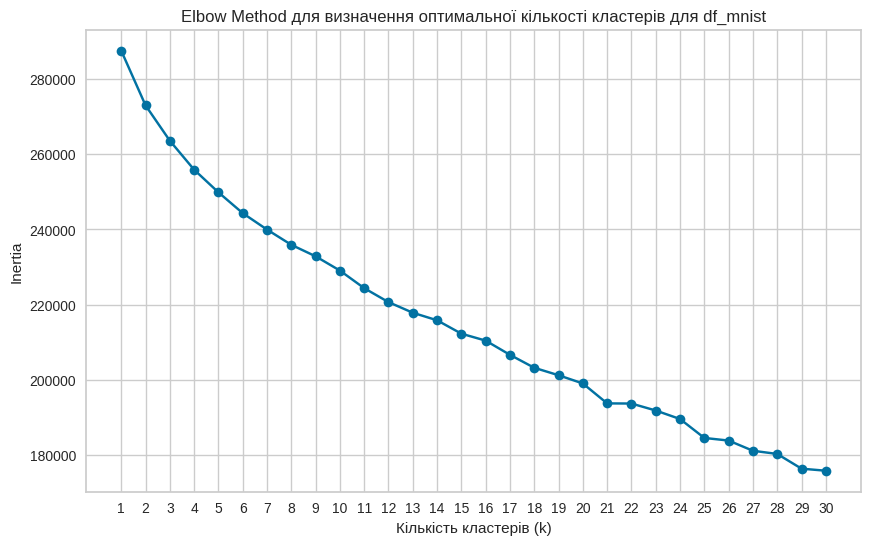

In [ ]:
inertia = []
k_values = range(1, 31)

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(df_mnist_scaled)
    inertia.append(kmeans.inertia_)

# Візуалізація методу Elbow
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method для визначення оптимальної кількості кластерів для df_mnist')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Elbow Method для визначення оптимальної кількості кластерів

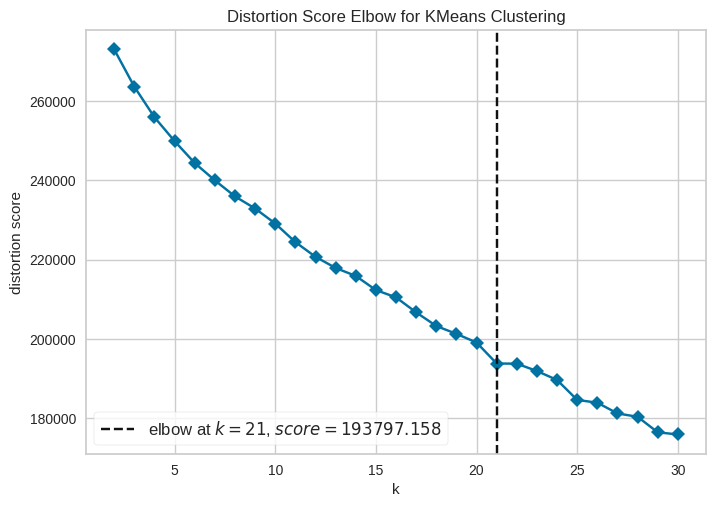

Оптимальна кількість кластерів (Elbow Method): 21


In [ ]:

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 31), metric='distortion', timings=False)
visualizer.fit(df_mnist_scaled)
visualizer.show()
optimal_k_elbow = visualizer.elbow_value_
print(f'Оптимальна кількість кластерів (Elbow Method): {optimal_k_elbow}')

In [ ]:
optimal_k = optimal_k_elbow
print(f'Оптимальна кількість кластерів: {optimal_k}')

Оптимальна кількість кластерів: 21


In [ ]:
pca = PCA(n_components=2)
df_mnist_pca = pca.fit_transform(df_mnist_scaled)
df_mnist_pca.shape

(500, 2)

In [ ]:
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
kmeans.fit(df_mnist_pca)

KMeans(n_clusters=21, n_init=10, random_state=42)

In [ ]:
df_mnist_clustered = pd.DataFrame(df_mnist_pca, columns=['PCA1', 'PCA2'])
df_mnist_clustered['Cluster'] = kmeans.labels_

# Візуалізація результатів кластеризації з PCA

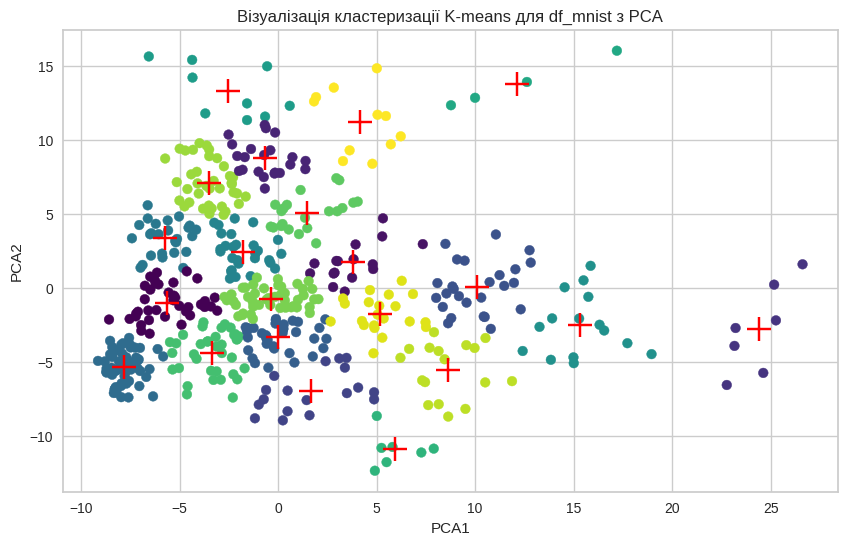

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(df_mnist_clustered['PCA1'], df_mnist_clustered['PCA2'], c=df_mnist_clustered['Cluster'], cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='+')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Візуалізація кластеризації K-means для df_mnist з PCA')
plt.grid(True)
plt.show()




In [ ]:
print(kmeans.cluster_centers_)

[[-5.63896229e+00 -1.01795220e+00]
 [ 3.77979277e+00  1.72346269e+00]
 [-6.71093227e-01  8.76324799e+00]
 [ 2.44071072e+01 -2.76748351e+00]
 [ 1.68248079e+00 -6.99822536e+00]
 [ 1.00956389e+01  2.71794510e-02]
 [-1.22151011e-03 -3.34070871e+00]
 [-7.80905323e+00 -5.38918179e+00]
 [-5.72723145e+00  3.35500533e+00]
 [-1.77637459e+00  2.45270076e+00]
 [ 1.53295640e+01 -2.52833158e+00]
 [-2.52353634e+00  1.33064853e+01]
 [ 1.21507148e+01  1.37886114e+01]
 [ 5.95273987e+00 -1.09185410e+01]
 [-3.37229153e+00 -4.40077088e+00]
 [ 1.47056045e+00  5.07126829e+00]
 [-3.51076926e-01 -7.29806882e-01]
 [-3.52505211e+00  7.09615360e+00]
 [ 8.60131373e+00 -5.55363025e+00]
 [ 5.19461424e+00 -1.76282054e+00]
 [ 4.16337498e+00  1.12200164e+01]]


In [ ]:
print(f"{kmeans.labels_}")

[ 8 13  7  5 15  7  9 17  1 15 10 19 17  5  7 19  2 17  5 17  8 16  1 14
  9  3 17  2  5  7  0  0 16  5 16 18  2  7  4  7  7  8 17  4 14  6  0  6
 20 20 14  5  9 16 10  1 20  7  2  0 11 18  8  6 15  0 19 15 16 10 17  3
 18 14  7  8 14  9  0 15 17 16 18 17  9 20  8 16 19  7  6 16  0 16  7 15
  0  0  6 11 16  5 15 20 15  2 18 14 17  9  6  7 14 17  0  0  8 20  8 15
  1 16  8 16  2  8 10  9 15 16 16 19 19 15 16  7 19  7 19  9 14 11  9  7
  8  7  9 10 19 16  2 20 14  6  7  6  1  1  6  0 17 18  1 20 16 19  9  6
  7 17 17 16 13  6  6  0  7  9  7  6  7  6  0  3  6  9 13 19 10  0  7  0
 18 17  5  0  7 14 17  4 18 10  7  7  7 14 17  1  4  2  2  0 20  0 17  1
 14 14  0  6 11 19 10  8  7  4  9  0  7  8 14 14  6 17  0 17  6  6  2  7
  6 15 19 17 14  6  3 14 20 14  2  0 11 14 17  8  4 14 18  5 16 14 11  8
  8  7 19  7  5  5 16  5  7  2 20  2  7  9 19  7  4  9  0  0  2  6 14 12
  7 16 15 13  2 16 19  2  3 10 18 14 14  9  7  9  0 10  4  8 17 14  6  3
  5 19  7  2 14 14 18  5  0  0 17 14 16  0  4 10  0

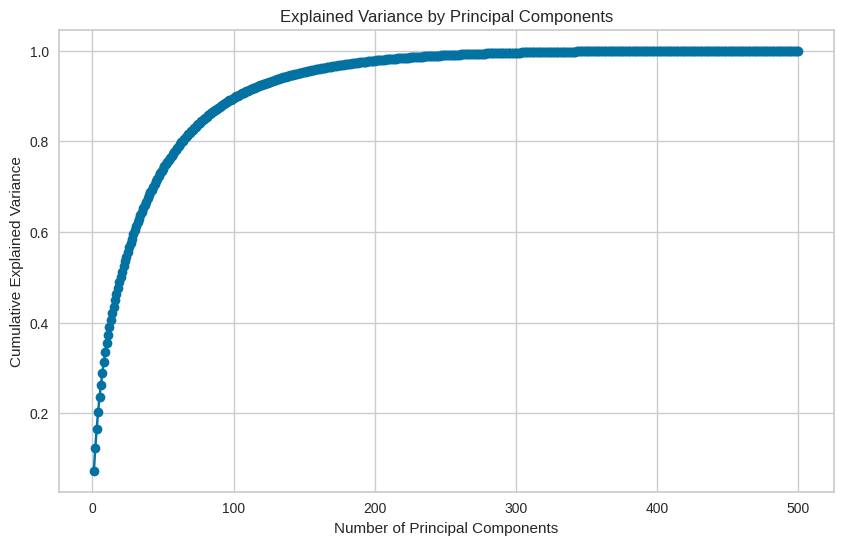

In [ ]:
pca_full = PCA().fit(df_mnist_scaled)
explained_variance_ratio = pca_full.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(0.95)
df_mnist_pca = pca.fit_transform(df_mnist)
print(f"{len(pca.components_)=}")
print(f"{df_mnist_pca.shape=}")

len(pca.components_)=114
df_mnist_pca.shape=(500, 114)


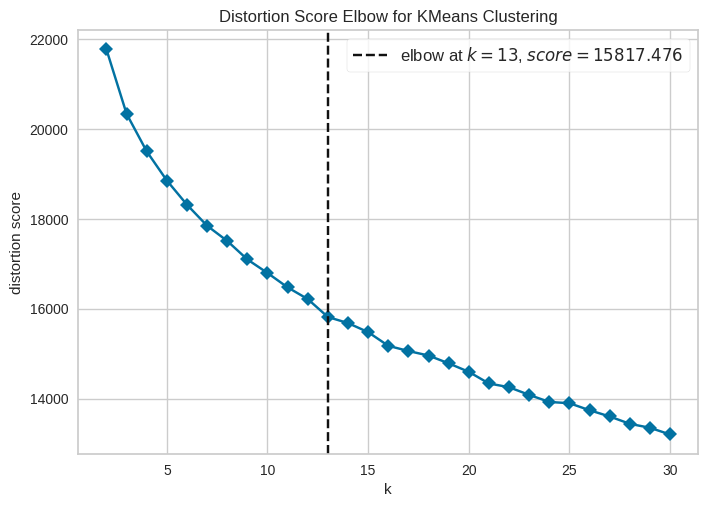

Оптимальна кількість кластерів (Elbow Method): 13


In [ ]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 31), metric='distortion', timings=False)
visualizer.fit(df_mnist_pca)
visualizer.show()
optimal_k_elbow = visualizer.elbow_value_
print(f'Оптимальна кількість кластерів (Elbow Method): {optimal_k_elbow}')

In [ ]:
optimal_k = optimal_k_elbow
print(f'Оптимальна кількість кластерів: {optimal_k}')

Оптимальна кількість кластерів: 13


In [ ]:
pca = PCA(n_components=2)
df_mnist_pca = pca.fit_transform(df_mnist_pca)
df_mnist_pca.shape

(500, 2)

In [ ]:
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
kmeans.fit(df_mnist_pca)

KMeans(n_clusters=13, n_init=10, random_state=42)

In [ ]:
df_mnist_clustered = pd.DataFrame(df_mnist_pca, columns=['PCA1', 'PCA2'])
df_mnist_clustered['Cluster'] = kmeans.labels_

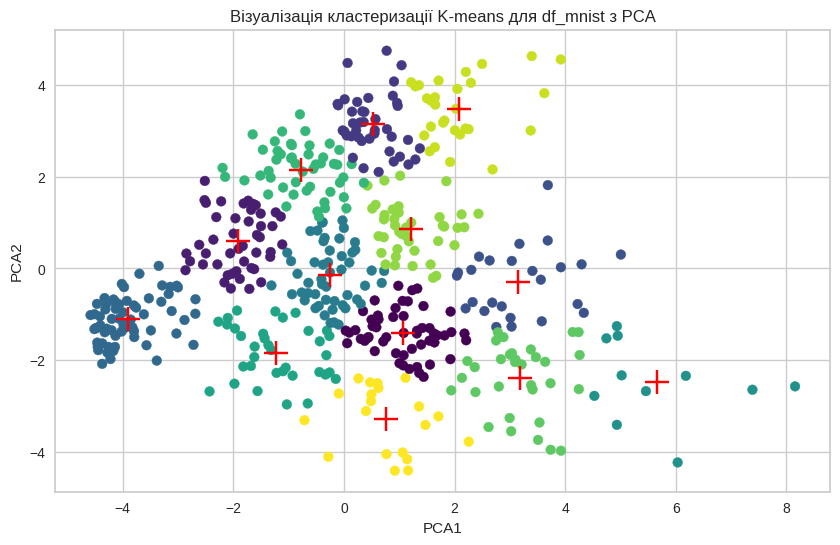

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_mnist_clustered['PCA1'], df_mnist_clustered['PCA2'], c=df_mnist_clustered['Cluster'], cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='+')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Візуалізація кластеризації K-means для df_mnist з PCA')
plt.grid(True)
plt.show()